In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date, datetime
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS

### Load Data

In [2]:
#Load data
df = pd.read_csv("SentimentLabeled_10112022.csv")

#### Meta Data
The twitter data is acquired by the China Data Lab at UC San Diego and they were sent to different researchers to label for sentiment and relevance. Because of this, there are duplicate tweets with different labels by various researchers. For the sake of exploratory analysis, we decide to remove duplicate tweets and describe the statistics on the rest of the dataset. The columns that we want to particularly focus on are the text column which contains the content of the tweets. Other useful features such as information related to the politician who posted the twitter are also crucial to analyze in the exploratory analysis process. These columns include name of the politician, birthday of the politician, term partisanship, term type, term state.

In [3]:
df.shape

(15846, 14)

In [4]:
df.columns

Index(['date', 'text', 'userid_str', 'status_id_str', 'id', 'name', 'birth',
       'term_partisanship', 'term_type', 'term_state', 'country', 'Bucket',
       'SentimentScore', 'version'],
      dtype='object')

In [5]:
df = df[['date', 'text', 'id', 'name', 'birth', 'term_partisanship', 'term_type', 'term_state']]

In [6]:
#Remove duplicates
df = df.drop_duplicates(subset=['id']).reset_index(drop=True)

In [7]:
#Number of unique tweets
df['id'].nunique()

14544

In [8]:
#Data range
df.date.sort_values()

3319     2009-05-08
2475     2009-05-18
1286     2009-06-03
3076     2009-06-09
3104     2009-06-16
            ...    
14154    2021-08-11
14153    2021-08-11
14126    2021-08-11
14147    2021-08-11
14185    2021-08-12
Name: date, Length: 14544, dtype: object

In [9]:
#Number of unique politician
df.name.nunique()

568

In [10]:
#Number of posts by each politician
df.name.value_counts()

Marsha Blackburn               451
Marco Rubio                    433
Jim Banks                      416
Ted Cruz                       408
Tom Cotton                     322
                              ... 
Jahana Hayes                     1
F. James Sensenbrenner, Jr.      1
Victoria Spartz                  1
Lori Trahan                      1
Xochitl Torres Small             1
Name: name, Length: 568, dtype: int64

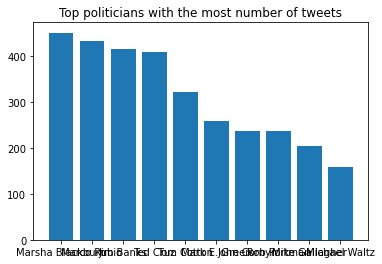

In [11]:
politician_tweet_count = pd.DataFrame(df.name.value_counts()).reset_index()
politician_tweet_count.columns = ['Politician', 'Number of Tweets']
politician_tweet_count_top_10 = politician_tweet_count.head(10)
plt.bar(politician_tweet_count_top_10['Politician'], politician_tweet_count_top_10['Number of Tweets'])
plt.title('Top politicians with the most number of tweets')
plt.show()

There are 14544 unique tweets in the dataset ranging from May 2009 to August 12.

### Missing values

In [12]:
df.isnull().sum(axis = 0)

date                   0
text                   0
id                     0
name                   0
birth                128
term_partisanship    128
term_type              0
term_state             0
dtype: int64

In [13]:
df.isnull().sum(axis = 1)

0        0
1        0
2        0
3        0
4        0
        ..
14539    2
14540    2
14541    2
14542    2
14543    2
Length: 14544, dtype: int64

### Partisianship Analysis

In [14]:
def replace_bracket(x):
    if pd.isnull(x) == False:
        return x.replace('{', '').replace('}', '')
    else:
        return np.nan

In [15]:
df.term_partisanship = df.term_partisanship.apply(replace_bracket)
df.term_type = df.term_type.apply(replace_bracket)
df.term_state = df.term_state.apply(replace_bracket)

In [16]:
df.term_partisanship.value_counts()

Republican     10420
Democrat        3889
Independent      107
Name: term_partisanship, dtype: int64

In [17]:
df.term_type.value_counts()

rep    9017
sen    5527
Name: term_type, dtype: int64

In [18]:
df.term_state.value_counts().head(10)

TX    1443
FL    1205
TN     932
CA     869
OH     729
IN     658
NY     639
AR     602
WI     397
MO     371
Name: term_state, dtype: int64

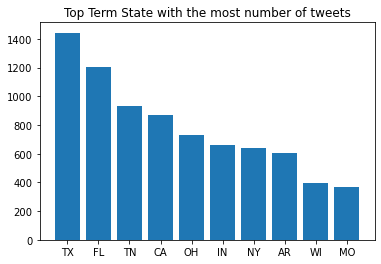

In [19]:
state_tweet_count = pd.DataFrame(df.term_state.value_counts()).reset_index()
state_tweet_count.columns = ['Term State', 'Number of Tweets']
state_tweet_count_top_10 = state_tweet_count.head(10)
plt.bar(state_tweet_count_top_10['Term State'], state_tweet_count_top_10['Number of Tweets'])
plt.title('Top Term State with the most number of tweets')
plt.show()

In [20]:
def age(birthdate):
    if pd.isnull(birthdate):
        return np.nan
    else:
        birthdate = datetime.strptime(birthdate, '%Y-%m-%d')
        today = date.today()
        age = today.year - birthdate.year - ((today.month, today.day) < (birthdate.month, birthdate.day))
        return int(age)

In [21]:
df['age'] = df.birth.apply(age)

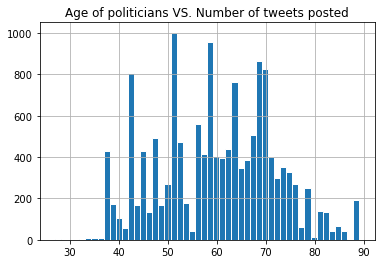

In [22]:
df['age'].hist(bins=50, ec='w')
plt.title('Age of politicians VS. Number of tweets posted')
plt.show()

### Word Cloud

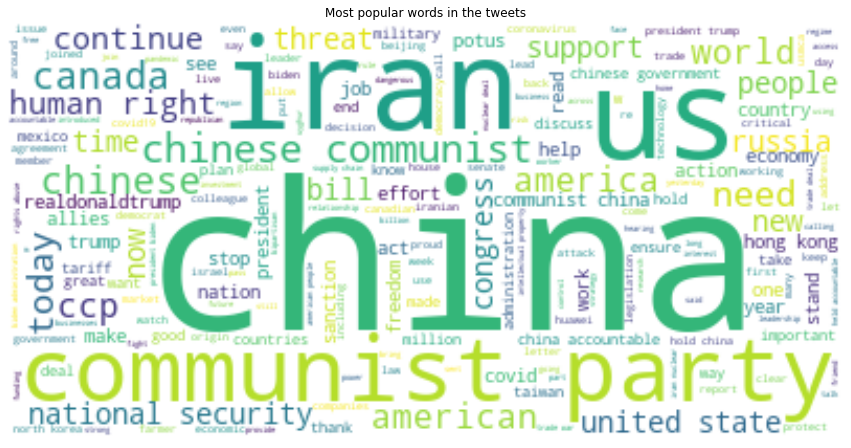

In [29]:
#Wordcloud
word_string=" ".join(df.text.str.lower())
df.text = df.text.str.lower()
text = " ".join(i for i in df.text.str.lower())
stopwords = set(STOPWORDS)
filter_word = ['https', 'amp', 'will', 'must', 'u', 't', 'co', 's']
for i in filter_word:
    stopwords.add(i)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most popular words in the tweets')
plt.show()